In [96]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.decomposition as skde
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [13]:
#reading the csv´s
TraL=pd.read_csv('train_labels_abiUmgM.csv')#train labels
TraV=pd.read_csv('train_values.csv')#train values
TesV=pd.read_csv('test_values.csv')#test values
#seeing the heads of the data

In [14]:
TraV['rate_spread']=TraL['rate_spread']

Clean the data

empecemos mirando si existen missing values

In [4]:
print((TraV.astype(np.object) == -1).any())
print('\n')
print(TraV.astype(np.object).isna().any())

row_id                            False
loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                            False
state_code                         True
county_code                       False
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                  False
population                        False
minority_population_pct           False
ffiecmedian_family_income         False
tract_to_msa_md_income_pct        False
number_of_owner-occupied_units    False
number_of_1_to_4_family_units     False
lender                            False
co_applicant                      False
rate_spread                       False
dtype: bool


row_id                            False
loan_type                 

In [5]:
print('applicant_income NaN: ',TraV['applicant_income'].isnull().sum())
print('population NaN: ',TraV['population'].isnull().sum())
print('minority_population_pct NaN: ',TraV['minority_population_pct'].isnull().sum())
print('ffiecmedian_family_income: ',TraV['ffiecmedian_family_income'].isnull().sum())
print('tract_to_msa_md_income_pct: ',TraV['tract_to_msa_md_income_pct'].isnull().sum())
print('number_of_owner-occupied_units: ',TraV['number_of_owner-occupied_units'].isnull().sum())
print('number_of_1_to_4_family_units: ',TraV['number_of_1_to_4_family_units'].isnull().sum())

applicant_income NaN:  10708
population NaN:  1995
minority_population_pct NaN:  1995
ffiecmedian_family_income:  1985
tract_to_msa_md_income_pct:  2023
number_of_owner-occupied_units:  2012
number_of_1_to_4_family_units:  2016


applicant_income NaN:  5.354 %
AxesSubplot(0.125,0.125;0.775x0.755)
count    189292.000000
mean         73.617902
std         105.696934
min           1.000000
25%          39.000000
50%          56.000000
75%          83.000000
max       10042.000000
Name: applicant_income, dtype: float64
Median:  56.0
Mode:  0    41.0
dtype: float64


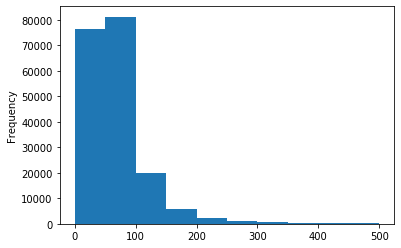

In [6]:
print('applicant_income NaN: ',TraV['applicant_income'].isnull().sum()/len(TraV)*100,'%')
print(TraV['applicant_income'].plot.hist(range=(0,500)))
print(TraV['applicant_income'].describe())
print('Median: ',TraV['applicant_income'].median())
print('Mode: ',TraV['applicant_income'].mode())


para este caso se debe, llenar los valores vacios con la mediana, y se deben de eliminar los outliers

In [97]:
#llenamos los NA con el valor de la mediana
TraV['applicant_income'].fillna(TraV['applicant_income'].median(),inplace=True)

TypeError: 'str' object is not callable

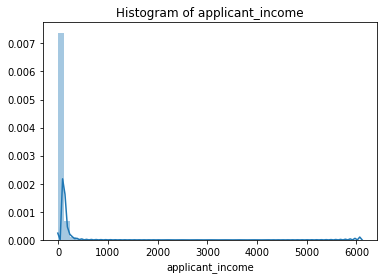

In [103]:
print(hist_plot(TraV['applicant_income'], 'applicant_income'))

In [8]:
var3=pd.DataFrame(TraV['rate_spread']*100,TraV['applicant_income'])
print(var3.head())

                  rate_spread
applicant_income             
77.0                    700.0
42.0                    100.0
34.0                    200.0
37.0                    300.0
46.0                    100.0


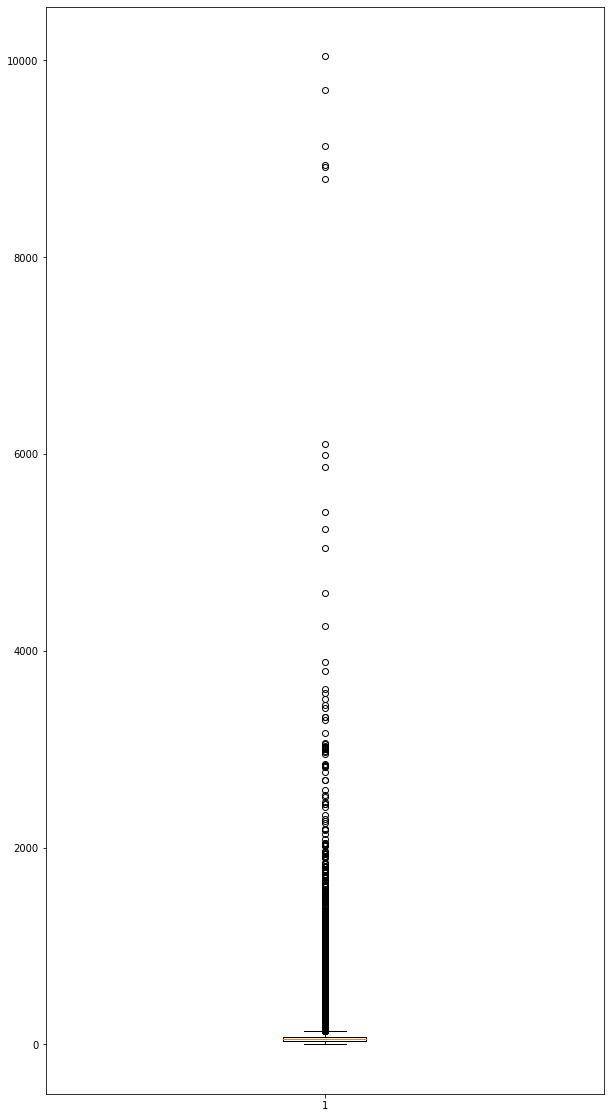

quartile_one:  40.0 quartile_Three:  80.0
The range of the dataset is 10041.0
The IQR of the dataset is 40.0
values grater than 1.5IQR:  84792
values grater than 1.5IQR(%):  42.396


In [9]:
#vamos a mirar el rango intercuartil de applicant income
plt.figure(figsize=(10,20))
plt.boxplot(TraV['applicant_income'])
plt.xlabel='Applicant Income'
plt.show()

dataset_range = max(TraV['applicant_income']) - min(TraV['applicant_income'])
q1 = np.quantile(TraV['applicant_income'], 0.25)
#Create the variables q3 and interquartile_range here:
q3 = np.quantile(TraV['applicant_income'], 0.75)
interquartile_range=q3-q1
print('quartile_one: ',q1,'quartile_Three: ',q3)
print("The range of the dataset is "+str(dataset_range))
print("The IQR of the dataset is "+str(interquartile_range))
#vamos a mirar cuantos valores estan por encima del rango superior, es decir >1.5IQR
print('values grater than 1.5IQR: ',TraV[TraV['applicant_income']>1.5*interquartile_range]['applicant_income'].count())
print('values grater than 1.5IQR(%): ',TraV[TraV['applicant_income']>1.5*interquartile_range]['applicant_income'].count()/len(TraV)*100)

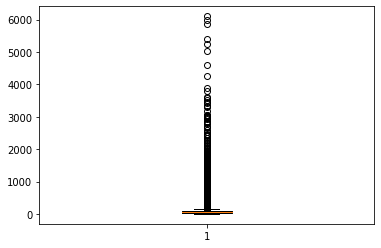

In [16]:
#vamos a remover los outliers superiores a 6110
TraV[TraV['applicant_income']>6110].count
TraV=TraV[TraV['applicant_income']<=6110].reset_index()
plt.boxplot(TraV['applicant_income'])
plt.show()

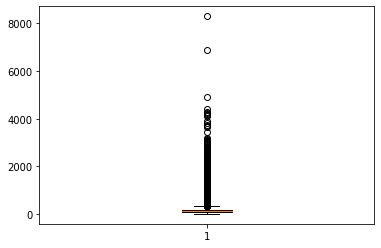

In [21]:
plt.boxplot(TraV['loan_amount'])
plt.show()
#se deben de eliminar los reseteos de index previos
TraV=TraV.drop(['level_0','index'],axis=1)
TraV=TraV[TraV['loan_amount']<=6000].reset_index()

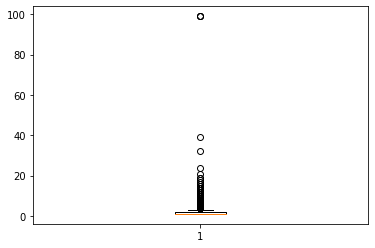

In [24]:
plt.boxplot(TraV['rate_spread'])
plt.show()
TraV=TraV.drop(['index'],axis=1)
TraV=TraV[TraV['rate_spread']<=50].reset_index()

In [25]:
corr = TraV.corr()
corr.style.background_gradient(cmap='coolwarm')

,index,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
index,1,1,0.00300803,-0.000221811,-0.00122582,-0.00248927,0.000402171,0.00018468,0.00173626,-0.00591643,0.00265856,-0.0010014,-0.00113063,-0.00426554,0.00289511,2.45421e-05,-0.00274819,-0.00459006,0.000458908,-0.00012212,-2.75444e-05,-0.00296432,0.00168643,0.00293854
row_id,1,1,0.003007,-0.000221128,-0.00122521,-0.00249023,0.000401547,0.000183738,0.00173507,-0.00591822,0.00265871,-0.00100196,-0.00113099,-0.0042663,0.00289597,2.36453e-05,-0.00274923,-0.00459104,0.000459113,-0.000122914,-2.85574e-05,-0.0029638,0.00168812,0.00293997
loan_type,0.00300803,0.003007,1,-0.309362,-0.249377,-0.235213,0.11108,-0.232993,-0.02992,0.0510519,-0.0175823,-0.140544,-0.0472387,0.0232091,-0.141409,0.0740224,0.137143,0.0939707,-0.0400257,0.0177917,0.000145597,0.0237858,-0.12962,-0.40245
property_type,-0.000221811,-0.000221128,-0.309362,1,-0.0913123,-0.00859752,-0.247197,0.143207,0.0489428,-0.0489545,0.0190785,0.170356,0.0582481,-0.00499797,-0.0899323,-0.0357083,-0.139216,-0.158751,0.0194297,0.0302599,0.0720158,-0.130544,0.0244717,0.544118
loan_purpose,-0.00122582,-0.00122521,-0.249377,-0.0913123,1,0.100764,-0.0822335,0.301056,0.000483147,-0.0644628,0.00646368,0.0745507,0.0398408,0.00605414,0.0670072,-0.0611706,-0.101914,-0.0295279,0.0260077,-0.0207716,-0.0179649,0.017173,0.077793,0.0365429
occupancy,-0.00248927,-0.00249023,-0.235213,-0.00859752,0.100764,1,-0.0301956,0.0521757,-0.00238818,-0.0131493,0.0157552,0.0415754,0.0039607,-0.0153513,0.170808,-0.0481924,-0.0124403,-0.0273132,-0.0358814,-0.0436884,0.0015666,0.00806318,0.0360473,0.00555943
loan_amount,0.000402171,0.000401547,0.11108,-0.247197,-0.0822335,-0.0301956,1,-0.108732,-0.0275192,-0.00381039,0.0126098,-0.0505707,-0.0650227,-0.0474087,0.468522,0.0725257,0.102505,0.253579,0.117974,0.0288445,-0.0263818,0.0714168,0.0816997,-0.272125
preapproval,0.00018468,0.000183738,-0.232993,0.143207,0.301056,0.0521757,-0.108732,1,0.0126165,-0.0308392,0.0255469,0.0374968,0.0355541,-0.00946458,0.015468,-0.0240435,-0.0386599,-0.0745841,0.00166583,-0.0110114,0.00620471,-0.170023,0.0644978,0.201398
msa_md,0.00173626,0.00173507,-0.02992,0.0489428,0.000483147,-0.00238818,-0.0275192,0.0126165,1,-0.0330159,-0.0165656,0.0292248,0.0143066,-0.00270034,0.00390681,0.00573954,-0.0330886,-0.0454451,0.022535,0.022182,0.0304271,0.0148668,0.0187496,0.0253839
state_code,-0.00591643,-0.00591822,0.0510519,-0.0489545,-0.0644628,-0.0131493,-0.00381039,-0.0308392,-0.0330159,1,-0.0399475,-0.113331,0.0633585,-0.00661747,0.00101334,0.0666558,0.0909787,-0.0845783,0.0319285,0.0253935,0.00906991,-0.0100798,0.00391826,-0.0164198


In [40]:
#vamos a eliminar las variables del censo minority_population_pct, ffiecmedian_family_income, tract_to_msa_md_income_pct,
# number_of_owner-occupied_units, number_of_1_to_4_family_units,row_id

df=TraV
df=df.drop(['index','row_id','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units'],axis=1)
df.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,lender,co_applicant,rate_spread
0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,2094,True,1.0
1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,4194,False,2.0
2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,1119,False,3.0
3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,1119,False,6.0
4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,1593,False,4.0


In [41]:
print(df[df['county_code']==-1].count(),'\n',df[df['state_code']==-1].count(),'\n')
print('total % of NA in State Code: ',len(df[df['state_code']==-1].count())/len(df)*100)

loan_type              0
property_type          0
loan_purpose           0
occupancy              0
loan_amount            0
preapproval            0
msa_md                 0
state_code             0
county_code            0
applicant_ethnicity    0
applicant_race         0
applicant_sex          0
applicant_income       0
lender                 0
co_applicant           0
rate_spread            0
dtype: int64 
 loan_type              1324
property_type          1324
loan_purpose           1324
occupancy              1324
loan_amount            1324
preapproval            1324
msa_md                 1324
state_code             1324
county_code            1324
applicant_ethnicity    1324
applicant_race         1324
applicant_sex          1324
applicant_income       1324
lender                 1324
co_applicant           1324
rate_spread            1324
dtype: int64 

total % of NA in State Code:  0.008453040717240505


In [42]:
#vamos a eliminar las filas que no tienen info en State Code
a=len(df)
df=df[df['state_code']!=-1].reset_index()
a-len(df)

1324

In [43]:
print(len(df.lender.unique()))

var6=df.groupby('lender').rate_spread.count().reset_index()
var6.columns=['lender','count']

print(var6.describe())

#vamos a disminuir la cantidad de categorias para lender, y dejarlas solo 4 así: 0-1(gestiones)(tipo: 1),2-3
#(tipo: 2),4-8(tipo: 3),9-24(tipo: 4)
list1=[]
list2=[]
list3=[]
list4=[]

for i in range(len(var6)):
    val=var6.iloc[i,1]
    cod=var6.iloc[i,0]
    if val<=1:
        list1.append(cod)
    elif val>=2 and val<=3:
        list2.append(cod)
    elif val>=4 and val<=8:
        list3.append(cod) 
    else:
        list4.append(cod)

print('list1: ',len(list1),'list2: ',len(list2),'list3: ',len(list3),'list4: ',len(list4))  
print('list1: ',round(len(list1)/len(var6)*100,2),'list2: ',round(len(list2)/len(var6)*100,2),'list3: ',round(len(list3)/len(var6)*100,2),'list4: ',round(len(list4)/len(var6)*100,2))
print(len(var6)==(len(list1)+len(list2)+len(list3)+len(list4)))
        

3846
            lender        count
count  3846.000000  3846.000000
mean   2138.699948    48.870775
std    1236.919341   245.850137
min       0.000000     1.000000
25%    1060.250000     2.000000
50%    2136.500000     8.000000
75%    3204.500000    23.000000
max    4283.000000  8944.000000
list1:  573 list2:  657 list3:  809 list4:  1807
list1:  14.9 list2:  17.08 list3:  21.03 list4:  46.98
True


In [44]:
print(var6[var6['lender']==2094])
print(2094 in list4)


      lender  count
1882    2094    293
True


In [45]:
#ahora vamos a reemplazar los valores de lender, ya agrupados en 4 categorias
lender_reg=[]

for y in range(len(df)):
    if df['lender'][y] in list1:
        lender_reg.append(1)
    elif df['lender'][y] in list2: 
        lender_reg.append(2)
    elif df['lender'][y] in list3: 
        lender_reg.append(3)
    elif df['lender'][y] in list4: 
        lender_reg.append(4)
    else:
        print('valor no encontrado: ',df['lender'][y])
        
print(len(lender_reg)==len(df))  
print('Lender_reg ready to be added')

True
Lender_reg ready to be added


In [47]:
#reemplazamos los valores recodificados de lender
df=df.drop(['lender'],axis=1)
df['lender_recode']=lender_reg


KeyError: "['lender'] not found in axis"

In [48]:
df.head()

,index,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,co_applicant,rate_spread,lender_recode
0,0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,True,1.0,4
1,1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,False,2.0,4
2,2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,False,3.0,4
3,3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,False,6.0,4
4,4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,False,4.0,4


In [49]:
df=df.drop(['index'],axis=1)

In [50]:
#ahora debemos seguir con la recodificación de msa_md,state_code y county_code
#msd_md
print(len(df.msa_md.unique()))

var6=df.groupby('msa_md').rate_spread.count().reset_index()
var6.columns=['msa_md','count']

print(var6.describe())

409
           msa_md         count
count  409.000000    409.000000
mean   204.000000    459.552567
std    118.212379   1748.082166
min      0.000000      9.000000
25%    102.000000     82.000000
50%    204.000000    159.000000
75%    306.000000    371.000000
max    408.000000  33154.000000


In [51]:
#vamos a disminuir la cantidad de categorias para msa_md, y dejarlas solo 4 así: 15-87(gestiones)(tipo: 1),88-168
#(tipo: 2),169-393(tipo: 3),394-34313(tipo: 4)
list1=[]
list2=[]
list3=[]
list4=[]

for i in range(len(var6)):
    val=var6.iloc[i,1]
    cod=var6.iloc[i,0]
    if val<=87:
        list1.append(cod)
    elif val>=88 and val<=168:
        list2.append(cod)
    elif val>=169 and val<=393:
        list3.append(cod) 
    else:
        list4.append(cod)

print('list1: ',len(list1),'list2: ',len(list2),'list3: ',len(list3),'list4: ',len(list4))  
print('list1: ',round(len(list1)/len(var6)*100,2),'list2: ',round(len(list2)/len(var6)*100,2),'list3: ',round(len(list3)/len(var6)*100,2),'list4: ',round(len(list4)/len(var6)*100,2))
print(len(var6)==(len(list1)+len(list2)+len(list3)+len(list4)))

list1:  116 list2:  96 list3:  100 list4:  97
list1:  28.36 list2:  23.47 list3:  24.45 list4:  23.72
True


In [52]:
#ahora vamos a reemplazar los valores de msa_md, ya agrupados en 4 categorias
lender_reg=[]
col='msa_md'

for y in range(len(df)):
    if df[col][y] in list1:
        lender_reg.append(1)
    elif df[col][y] in list2: 
        lender_reg.append(2)
    elif df[col][y] in list3: 
        lender_reg.append(3)
    elif df[col][y] in list4: 
        lender_reg.append(4)
    else:
        print('valor no encontrado: ',df[col][y])
        
print(len(lender_reg)==len(df))  
print(col+' ready to be added')

True
msa_md ready to be added


In [53]:
df=df.drop(['msa_md'],axis=1)
df['msa_md_recode']=lender_reg
print('replacement done')

replacement done


In [54]:
#state_code
print(len(df.state_code.unique()))

var6=df.groupby('state_code').rate_spread.count().reset_index()
var6.columns=['state_code','count']

print(var6.describe())

52
       state_code         count
count   52.000000     52.000000
mean    26.423077   3614.557692
std     15.280830   4367.106524
min      0.000000    104.000000
25%     13.750000    790.250000
50%     26.500000   2383.000000
75%     39.250000   4768.000000
max     52.000000  24521.000000


In [55]:
#vamos a disminuir la cantidad de categorias para state_code, y dejarlas solo 4 así: 113-849(gestiones)(tipo: 1),
#850-2477(tipo: 2),2478-5017(tipo: 3),5018-25596(tipo: 4)
list1=[]
list2=[]
list3=[]
list4=[]

for i in range(len(var6)):
    val=var6.iloc[i,1]
    cod=var6.iloc[i,0]
    if val<=849:
        list1.append(cod)
    elif val>=850 and val<=2477:
        list2.append(cod)
    elif val>=2478 and val<=5017:
        list3.append(cod) 
    else:
        list4.append(cod)

print('list1: ',len(list1),'list2: ',len(list2),'list3: ',len(list3),'list4: ',len(list4))  
print('list1: ',round(len(list1)/len(var6)*100,2),'list2: ',round(len(list2)/len(var6)*100,2),'list3: ',round(len(list3)/len(var6)*100,2),'list4: ',round(len(list4)/len(var6)*100,2))
print(len(var6)==(len(list1)+len(list2)+len(list3)+len(list4)))

list1:  15 list2:  12 list3:  14 list4:  11
list1:  28.85 list2:  23.08 list3:  26.92 list4:  21.15
True


In [56]:
#ahora vamos a reemplazar los valores de state_code, ya agrupados en 4 categorias
lender_reg=[]
col='state_code'

for y in range(len(df)):
    if df[col][y] in list1:
        lender_reg.append(1)
    elif df[col][y] in list2: 
        lender_reg.append(2)
    elif df[col][y] in list3: 
        lender_reg.append(3)
    elif df[col][y] in list4: 
        lender_reg.append(4)
    else:
        print('valor no encontrado: ',df[col][y])
        
print(len(lender_reg)==len(df))  
print(col+' ready to be added')

True
state_code ready to be added


In [57]:
df=df.drop(['state_code'],axis=1)
df['state_code_recode']=lender_reg
print('replacement done')

replacement done


In [58]:
#county_code
print(len(df.county_code.unique()))

var6=df.groupby('county_code').rate_spread.count().reset_index()
var6.columns=['county_code','count']

print(var6.describe())

306
       county_code        count
count   306.000000   306.000000
mean    157.199346   614.238562
std      91.794190  1042.070835
min       0.000000     1.000000
25%      77.250000    15.250000
50%     157.500000    66.000000
75%     236.750000   841.500000
max     316.000000  7489.000000


In [59]:
#vamos a disminuir la cantidad de categorias para county_code, y dejarlas solo 4 así: 1-16(gestiones)(tipo: 1),
#17-69(tipo: 2),70-873(tipo: 3),874-7905(tipo: 4)
list1=[]
list2=[]
list3=[]
list4=[]

for i in range(len(var6)):
    val=var6.iloc[i,1]
    cod=var6.iloc[i,0]
    if val<=16:
        list1.append(cod)
    elif val>=17 and val<=69:
        list2.append(cod)
    elif val>=70 and val<=873:
        list3.append(cod) 
    else:
        list4.append(cod)

print('list1: ',len(list1),'list2: ',len(list2),'list3: ',len(list3),'list4: ',len(list4))  
print('list1: ',round(len(list1)/len(var6)*100,2),'list2: ',round(len(list2)/len(var6)*100,2),'list3: ',round(len(list3)/len(var6)*100,2),'list4: ',round(len(list4)/len(var6)*100,2))
print(len(var6)==(len(list1)+len(list2)+len(list3)+len(list4)))

list1:  82 list2:  74 list3:  75 list4:  75
list1:  26.8 list2:  24.18 list3:  24.51 list4:  24.51
True


In [60]:
#ahora vamos a reemplazar los valores de county_code, ya agrupados en 4 categorias
lender_reg=[]
col='county_code'

for y in range(len(df)):
    if df[col][y] in list1:
        lender_reg.append(1)
    elif df[col][y] in list2: 
        lender_reg.append(2)
    elif df[col][y] in list3: 
        lender_reg.append(3)
    elif df[col][y] in list4: 
        lender_reg.append(4)
    else:
        print('valor no encontrado: ',df[col][y])
        
print(len(lender_reg)==len(df))  
print(col+' ready to be added')

True
county_code ready to be added


In [61]:
df=df.drop(['county_code'],axis=1)
df['county_code_recode']=lender_reg
print('replacement done')

replacement done


In [62]:
#ahora vamos a eliminar las columnas rate_spread y la index, ademas de que vamos a empezar a normalizar los datos
#continuos y vamos aplicar el hotcoding a la varibles categoricas

df.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,co_applicant,rate_spread,lender_recode,msa_md_recode,state_code_recode,county_code_recode
0,2,1,1,1,139.0,1,2,5,1,77.0,True,1.0,4,4,3,4
1,2,2,1,1,160.0,3,1,5,1,42.0,False,2.0,4,4,4,3
2,1,2,1,1,168.0,3,3,2,1,34.0,False,3.0,4,3,4,4
3,1,2,1,1,57.0,3,1,6,1,37.0,False,6.0,4,4,4,4
4,2,1,2,1,25.0,3,2,5,2,46.0,False,4.0,4,4,4,4


In [76]:

#vamos primero a aplicar el proceso de hot encoding a las variables categoricas
#este primer paso es para transformar los valores a dummy variables

categorical_columns = ['loan_purpose','occupancy','preapproval','applicant_ethnicity',
                      'applicant_race','applicant_sex','lender_recode','msa_md_recode','state_code_recode',
                      'county_code_recode']
#matrix=pd.DataFrame()
#for col in categorical_columns: 
cat_feature=np.array(df['loan_type'])
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(cat_feature.reshape(-1,1))
x=encoded.transform(cat_feature.reshape(-1,1)).toarray()
    

cat_feature=np.array(df['property_type'])
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(cat_feature.reshape(-1,1))
y=encoded.transform(cat_feature.reshape(-1,1)).toarray()
    
matriz=np.concatenate([x, y], axis = 1)

for col in categorical_columns:
    cat_feature=np.array(df[col])
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(cat_feature.reshape(-1,1))
    z=encoded.transform(cat_feature.reshape(-1,1)).toarray()
    matriz = np.concatenate([matriz, z], axis = 1)
    
print(matriz.shape)
print(len(df))

C:\Users\Chr1st14n_Ru4\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Chr1st14n_Ru4\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'"

(187957, 46)
187957


C:\Users\Chr1st14n_Ru4\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Chr1st14n_Ru4\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'"

In [77]:
#ahora vamos a convertir en binario al campo co_applicant

x = df['co_applicant']
enc = preprocessing.LabelEncoder()
enc.fit(x)
x = enc.transform(x)
matriz = np.concatenate([matriz, x.reshape(-1,1)], axis = 1)
print(matriz.shape)
print(len(df))

(187957, 47)
187957


In [78]:
#el sigguiente paso es normalizar las variables numericas que son: loan_amount,applicant_income

matriz = np.concatenate([matriz, np.array(df[['loan_amount', 'applicant_income']])], axis = 1)
scaler = preprocessing.StandardScaler().fit(matriz[:,48:])
matriz[:,48:] = scaler.transform(matriz[:,48:])
print(matriz.shape)

(187957, 49)


In [81]:
#ahora aplicamos el PCA(Principal Component Analisis)
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(matriz)
pca_comps
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[9.99696576e-01 5.35780378e-05 3.20024921e-05 2.64689776e-05
 2.39913817e-05 2.00283813e-05 1.78636072e-05 1.54409485e-05
 1.47697547e-05 1.41303975e-05 1.20817404e-05 1.17906124e-05
 9.62011305e-06 8.48622938e-06 6.98668441e-06 5.41478271e-06
 4.90377314e-06 4.23527420e-06 3.72158069e-06 3.05078192e-06
 2.76710624e-06 2.32545576e-06 2.23620359e-06 1.53364002e-06
 1.32977164e-06 1.10205709e-06 9.41353749e-07 6.80176127e-07
 5.99521238e-07 3.84229723e-07 2.36391082e-07 2.22351037e-07
 2.12661652e-07 1.69948544e-07 8.47156335e-08 2.14956614e-08
 1.11003353e-08 2.52397697e-31 1.84349800e-31 1.40938457e-31
 6.66931990e-32 9.79598940e-33 9.79598940e-33 9.79598940e-33
 9.79598940e-33 9.79598940e-33 9.79598940e-33 9.79598940e-33
 2.81824375e-34]
1.0000000000000002


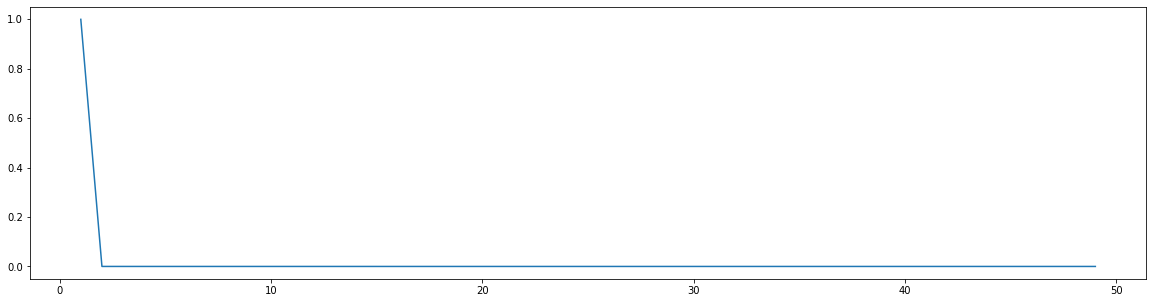

In [94]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x] 
    plt.figure(figsize=(20,5))
    plt.plot(x,comps)

plot_explained(pca_comps)

al parecer la mayoria de la variabilidad esta explicada solo por 3 componentes